In [2]:
from sklearn.datasets import load_iris
import numpy as np

# Load the Iris dataset
iris = load_iris()

# Extract the data from the dataset
iris_data = iris.data

# Convert the data to a 2D numpy array
iris_data_2d = np.array(iris_data)

# Print the shape of the 2D numpy array
print("Shape of 2D numpy array:", iris_data_2d.shape)
print("The values for the target variable are", iris.target)
print('The feature names for iris dataset are', iris.feature_names)


Shape of 2D numpy array: (150, 4)
The values for the target variable are [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
The feature names for iris dataset are ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3 )
model.fit(iris_data_2d)
y_pred = model.predict(iris_data)

/Users/peterhou/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


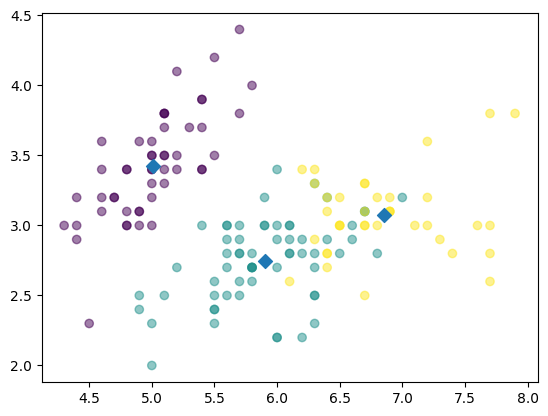

In [4]:
# Visualize predicted clusters
# We are not able to visualize dimension higher than 3, at least not now, we use a 2D scatterplot as a simple visualization
from matplotlib import pyplot as plt

xs = iris_data_2d[:, 0] #sepal length (cm)
ys = iris_data_2d[:, 1] #sepal width (cm)

plt.scatter(xs, ys, c = y_pred, alpha = 0.5)

centroids = model.cluster_centers_

centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

plt.scatter(centroids_x, centroids_y, marker = 'D', s = 50)
plt.show()

In [5]:

import pandas as pd
pd.crosstab(pd.Series(y_pred, name = 'Predicted'), pd.Series(iris.target, name = 'Actual'))

Actual,0,1,2
Predicted,,,
0,50,0,0
1,0,48,14
2,0,2,36


In [6]:
# Evaluate the cluster

model.inertia_

78.85144142614601

In [10]:
wine = pd.read_csv("./datasets/wine.txt", sep = ",")

In [11]:
wine.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [35]:
num_wine = wine.select_dtypes(exclude = ['object'])

In [36]:
cat_wine = wine.select_dtypes(include = ['object'])

In [43]:
num_wine_features = num_wine.drop('class_label', axis = 1)
num_wine_label = num_wine['class_label']

In [61]:
model = KMeans(n_clusters = 3)
pred = model.fit_predict(num_wine_features)
print(pd.crosstab(pd.Series(pred, name = 'Predicted'), pd.Series(num_wine_label, name = 'Actual')))
print(model.inertia_)


Actual      1   2   3
Predicted            
0          46   1   0
1           0  50  19
2          13  20  29
2370689.686782968


/Users/peterhou/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Note that the above prediction is not doing a great job due to the diverse variance between the features

In [51]:
num_wine_features.describe().loc['std'].sort_values(ascending= False)

proline                 314.907474
magnesium                14.282484
alcalinity_of_ash         3.339564
color_intensity           2.318286
malic_acid                1.117146
flavanoids                0.998859
alcohol                   0.811827
od280                     0.709990
total_phenols             0.625851
proanthocyanins           0.572359
ash                       0.274344
hue                       0.228572
nonflavanoid_phenols      0.124453
Name: std, dtype: float64

In [62]:
# Apply StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
kmeans = KMeans(n_clusters = 3)

pipeline = [("scaler", scaler), ("kmeans", kmeans)]

pipeline = Pipeline(pipeline)

pipeline.fit(num_wine_features)

pred = pipeline.predict(num_wine_features)

print(pd.crosstab(pd.Series(pred, name = 'Predicted'), pd.Series(num_wine_label, name = 'Actual')))

pipeline.named_steps['kmeans'].inertia_

# now the following results are way better

Actual      1   2   3
Predicted            
0           0  65   0
1           0   3  48
2          59   3   0


/Users/peterhou/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


1277.928488844642

In [63]:
# Hierarchical Clustering


## agglomerative hierarchical clustering
1. every unit begins in a separate cluster
2. at each step, the two closest clusters are merged together
3. continue until all units in a single cluster


In [86]:

countries = pd.read_csv('./datasets/enrovision_2016.txt', sep = ',')

countries.head()

num_countries = countries.drop(['From country', 'To country'], axis = 1).dropna()

num_countries_name = countries.iloc[num_countries.index,]['From country']


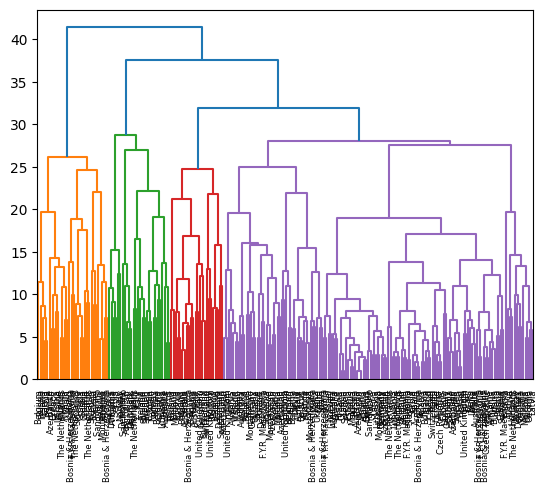

In [109]:
# The entire agglomerative hierachical clustering is carried out by dendrograms
# we use linkage and dendrogram function of scipy.cluster.hierachy module

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(num_countries, method = 'complete')

dendrogram(mergings, 
            labels = list(num_countries_name.reset_index(drop = True)),
            leaf_rotation = 90,
            leaf_font_size = 6 )

plt.show()

